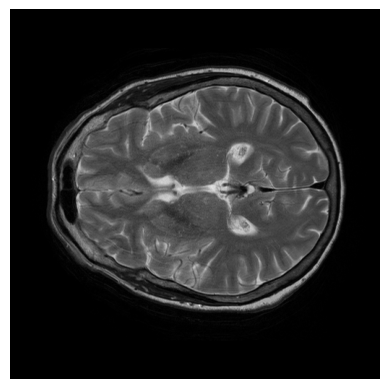

Shape: (512, 512)


OrderedDict([('type', 'unsigned short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([512, 512,  22])),
             ('space directions',
              array([[ 4.43985309e-01, -3.24180875e-02,  6.01963309e-02],
                     [ 3.27221662e-02,  4.48025380e-01, -6.70328298e-05],
                     [-7.34995299e-01,  5.44968988e-02,  5.45039532e+00]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-115.49926551, -107.03236488,  -60.7367884 ]))])

In [8]:
import nrrd
from numpy import float64, intp
from Meningioma import ImageProcessing
import os
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from typing_extensions import LiteralString

path: str = "/home/mariopasc/Python/Datasets/Meningiomas/Meningioma_Adquisition/RM/"
pulse: str = "T2"
patient: str = "P4"

nrrd_path: LiteralString = os.path.join(path, pulse, patient, f"{pulse}_{patient}.nrrd") 

# Open the NRRD file and process the image
image, header = ImageProcessing.open_nrrd_file(nrrd_path=nrrd_path, return_header=True)  # type: ignore
transversal_axis: intp = ImageProcessing.get_transversal_axis(nrrd_path=nrrd_path)
middle_slice: NDArray[float64] = ImageProcessing.extract_transversal_slice(image_data=image, transversal_axis=transversal_axis)

# Display the slice without borders and save as PNG
plt.imshow(middle_slice, cmap="gray")
plt.axis('off')  # Turn off axis
plt.gca().set_axis_off()  # Ensure no axis lines
plt.gca().set_frame_on(False)  # Remove the frame
#plt.savefig("./scripts/MRI_Noise_Modelling/input_mri_image.png", bbox_inches='tight', pad_inches=0)
plt.show()

print(f"Shape: {middle_slice.shape}")
header

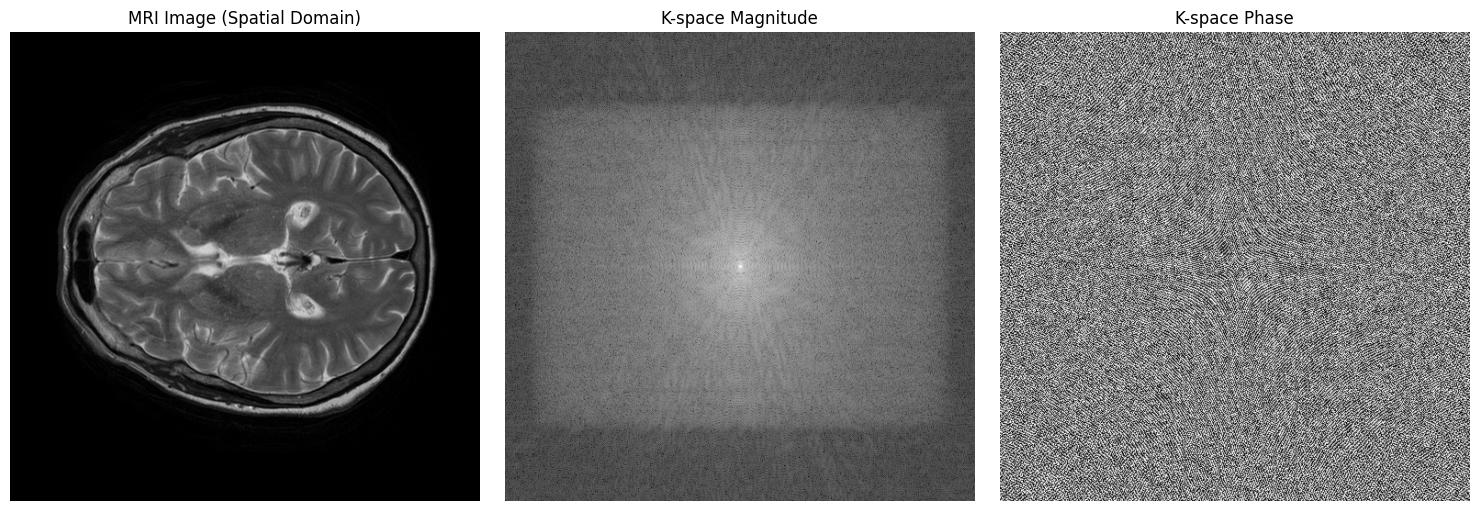

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def approximate_k_space(image):
    """
    Approximates k-space data from an MRI image using the Fourier Transform.
    """
    k_space = np.fft.fftshift(np.fft.fft2(image))  # FFT and shift
    return k_space

def extract_phase(k_space):
    """
    Extracts phase information from k-space data.
    """
    phase = np.angle(k_space)  # Extract phase from the complex k-space
    return phase

def plot_phase_data(image, k_space, phase):
    """
    Plot the original MRI image, k-space magnitude, and phase data.
    """
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("MRI Image (Spatial Domain)")
    plt.axis('off')

    # k-space magnitude
    plt.subplot(1, 3, 2)
    plt.imshow(np.log1p(np.abs(k_space)), cmap='gray')
    plt.title("K-space Magnitude")
    plt.axis('off')

    # Phase data
    plt.subplot(1, 3, 3)
    plt.imshow(phase, cmap='gray')
    plt.title("K-space Phase")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Load an example MRI image (replace this with your image)
image = middle_slice

# Approximate k-space and extract phase data
k_space = approximate_k_space(image)
phase = extract_phase(k_space)

# Plot results
plot_phase_data(image, k_space, phase)
